数据的前几行:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  1831.979980   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  1831.369995   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  1826.770020   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  1837.880005   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  1837.489990   

                Volume  
Date                    
2014-01-02  3080600000  
2014-01-03  2774270000  
2014-01-06  3294850000  
2014-01-07  3511750000  
2014-01-08  3652140000  
NaN values in 'Close': 0
数据类型:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
数据统计信息:
              Open         High          Low        Close    Adj Close  \
count  251

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


统计数据:
Start                     2014-01-23 00:00:00
End                       2023-12-29 00:00:00
Duration                   3627 days 00:00:00
Exposure Time [%]                   37.969624
Equity Final [$]                 18773.017973
Equity Peak [$]                  18807.457425
Return [%]                           87.73018
Buy & Hold Return [%]              160.865984
Return (Ann.) [%]                    6.549201
Volatility (Ann.) [%]               13.601024
Sharpe Ratio                         0.481523
Sortino Ratio                        0.740942
Calmar Ratio                         0.266603
Max. Drawdown [%]                  -24.565388
Avg. Drawdown [%]                     -2.7071
Max. Drawdown Duration      438 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   11
Win Rate [%]                        81.818182
Best Trade [%]                      18.324905
Worst Trade [%]                     -2.191561
Avg. Trade [%]              

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Optimized upper_bound: 80
Optimized lower_bound: 30
使用自定义函数优化参数:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


创建参数优化热图:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


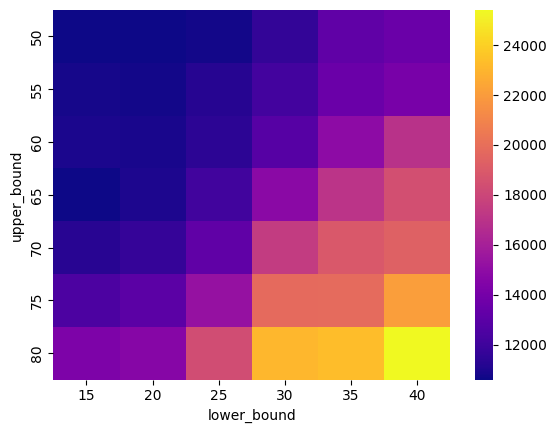

运行多时间框架策略的回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


运行含止损和止盈的策略回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


提取并打印交易数据:
    Size  EntryBar  ExitBar   EntryPrice    ExitPrice          PnL  ReturnPct  EntryTime   ExitTime Duration
0      5       185      209  1859.661851  2051.159912   957.490305   0.102975 2014-10-16 2014-11-19  34 days
1      5       399      399  1969.080324  1872.345514  -483.674049  -0.049127 2015-08-24 2015-08-24   0 days
2      5       495      501  1929.972235  1825.928528  -520.218537  -0.053909 2016-01-11 2016-01-20   9 days
3      5       502      552  1865.182881  2073.189941  1040.035300   0.111521 2016-01-21 2016-04-04  74 days
4      5       703      718  2087.957619  2210.209961   611.261710   0.058551 2016-11-04 2016-11-28  24 days
5      4      1017     1160  2620.009589  2908.939941  1155.721408   0.110278 2018-02-06 2018-08-30 205 days
6      4      1189     1200  2782.423857  2646.395935  -544.111687  -0.048888 2018-10-11 2018-10-26  15 days
7      4      1202     1236  2645.961292  2509.187500  -547.095167  -0.051692 2018-10-30 2018-12-19  50 days
8      4

In [5]:
import pandas as pd
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '../Datasets/SPX.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)

# 显示数据的前几行
print("数据的前几行:")
print(data.head())

# 检查 'Close' 列是否有 NaN 值
print("NaN values in 'Close':", data['Close'].isna().sum())

# 填充 'Close' 列中的 NaN 值
data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')

# 检查数据类型和统计信息
print("数据类型:")
print(data.dtypes)
print("数据统计信息:")
print(data.describe())

# 计算 RSI 并移除包含 NaN 值的行
data['RSI'] = ta.rsi(data['Close'], length=14)
data = data.dropna(subset=['RSI'])

print("数据（移除 NaN 后）的前几行:")
print(data.head())

# 定义 RsiOscillator 策略类
class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

# 运行回测
print("运行基本的 RSI 策略回测:")
bt = Backtest(data, RsiOscillator, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 打印统计数据
print("统计数据:")
print(stats)

# 优化参数
print("优化策略参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]'
)

# 打印优化后的参数
strategy = stats["_strategy"]
print(f"Optimized upper_bound: {strategy.upper_bound}")
print(f"Optimized lower_bound: {strategy.lower_bound}")

# 自定义优化函数
def optim_func(series):
    if series['# Trades'] < 10:
        return -1
    else:
        return series['Equity Final [$]']/series['Exposure Time [%]']

# 使用自定义函数优化参数
print("使用自定义函数优化参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize=optim_func
)

# 创建参数优化热图
print("创建参数优化热图:")
stats, heatmap = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]',
    return_heatmap=True
)

hm = heatmap.groupby(["upper_bound", "lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()

# 定义多时间框架策略
class RsiOscillatorMultiTF(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.daily_rsi = self.I(ta.rsi, close, self.rsi_window)
        weekly_close = close.resample('W-FRI').last().ffill()
        weekly_rsi = ta.rsi(weekly_close, self.rsi_window).reindex(close.index, method='ffill')
        self.weekly_rsi = self.I(lambda: weekly_rsi.values, name='weekly_rsi')

    # 逐步执行
    def next(self):
        if (crossover(self.daily_rsi, self.upper_bound) and
                self.weekly_rsi[-1] > self.upper_bound):
            self.position.close()
        elif (crossover(self.lower_bound, self.daily_rsi) and
                self.lower_bound > self.weekly_rsi[-1]):
            self.buy()

# 运行多时间框架策略的回测
print("运行多时间框架策略的回测:")
bt = Backtest(data, RsiOscillatorMultiTF, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 定义含止损和止盈的策略
class RsiOscillatorWithSLTP(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        price = self.data.Close[-1]
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy(tp=1.15 * price, sl=0.95 * price)

# 运行含止损和止盈的策略回测
print("运行含止损和止盈的策略回测:")
bt = Backtest(data, RsiOscillatorWithSLTP, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 提取并打印交易数据
print("提取并打印交易数据:")
print(stats['_trades'].to_string())


数据的前几行:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  1831.979980   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  1831.369995   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  1826.770020   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  1837.880005   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  1837.489990   

                Volume  
Date                    
2014-01-02  3080600000  
2014-01-03  2774270000  
2014-01-06  3294850000  
2014-01-07  3511750000  
2014-01-08  3652140000  
NaN values in 'Close': 0
数据类型:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
数据统计信息:
              Open         High          Low        Close    Adj Close  \
count  251

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


统计数据:
Start                     2014-01-23 00:00:00
End                       2023-12-29 00:00:00
Duration                   3627 days 00:00:00
Exposure Time [%]                    68.82494
Equity Final [$]                 17422.226138
Equity Peak [$]                  17422.226138
Return [%]                          74.222261
Buy & Hold Return [%]              160.865984
Return (Ann.) [%]                    5.750839
Volatility (Ann.) [%]               14.748824
Sharpe Ratio                         0.389918
Sortino Ratio                        0.577573
Calmar Ratio                         0.194888
Max. Drawdown [%]                  -29.508466
Avg. Drawdown [%]                    -2.07387
Max. Drawdown Duration      623 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                    3
Win Rate [%]                            100.0
Best Trade [%]                       36.05828
Worst Trade [%]                      8.675485
Avg. Trade [%]              

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Optimized upper_bound: 80
Optimized lower_bound: 30
使用自定义函数优化参数:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


创建参数优化热图:


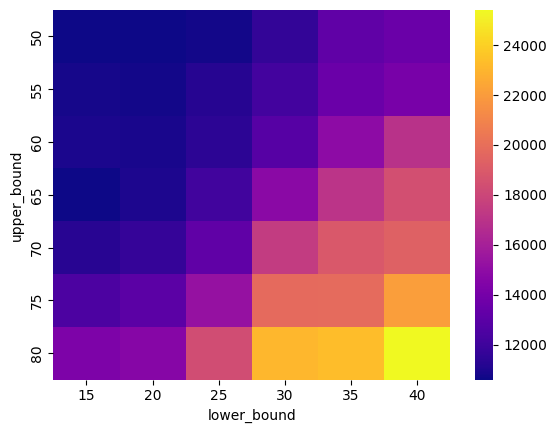

运行多时间框架策略的回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


运行含止损和止盈的策略回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


提取并打印交易数据:
    Size  EntryBar  ExitBar   EntryPrice    ExitPrice          PnL  ReturnPct  EntryTime   ExitTime Duration
0      5       185      620  1859.661851  2141.863488  1411.008188   0.151749 2014-10-16 2016-07-11 634 days
1      5       703      776  2087.957619  2361.110107  1365.762440   0.130823 2016-11-04 2017-02-22 110 days
2      4      1017     1236  2620.009589  2516.492944  -414.066580  -0.039510 2018-02-06 2018-12-19 316 days
3      4      1237     1239  2501.763560  2381.611963  -480.606388  -0.048027 2018-12-20 2018-12-24   4 days
4      4      1349     1483  2768.165173  3156.117444  1551.809083   0.140148 2019-06-04 2019-12-12 191 days
5      4      1533     1535  3146.179702  2916.899902  -917.119199  -0.072876 2020-02-26 2020-02-28   2 days
6      4      1542     1544  2819.106940  2609.232056  -839.499536  -0.074447 2020-03-10 2020-03-12   2 days
7      4      1545     1548  2575.129970  2356.607898  -874.088287  -0.084859 2020-03-13 2020-03-18   5 days
8      2

In [6]:
import pandas as pd
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '../Datasets/SPX.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)

# 显示数据的前几行
print("数据的前几行:")
print(data.head())

# 检查 'Close' 列是否有 NaN 值
print("NaN values in 'Close':", data['Close'].isna().sum())

# 填充 'Close' 列中的 NaN 值
data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')

# 检查数据类型和统计信息
print("数据类型:")
print(data.dtypes)
print("数据统计信息:")
print(data.describe())

# 计算 RSI 并移除包含 NaN 值的行
data['RSI'] = ta.rsi(data['Close'], length=14)
data = data.dropna(subset=['RSI'])

print("数据（移除 NaN 后）的前几行:")
print(data.head())

# 定义 RsiOscillator 策略类
class RsiOscillator(Strategy):
    upper_bound = 80
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

# 运行回测
print("运行基本的 RSI 策略回测:")
bt = Backtest(data, RsiOscillator, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 打印统计数据
print("统计数据:")
print(stats)

# 优化参数
print("优化策略参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]'
)

# 打印优化后的参数
strategy = stats["_strategy"]
print(f"Optimized upper_bound: {strategy.upper_bound}")
print(f"Optimized lower_bound: {strategy.lower_bound}")

# 自定义优化函数
def optim_func(series):
    if series['# Trades'] < 10:
        return -1
    else:
        return series['Equity Final [$]']/series['Exposure Time [%]']

# 使用自定义函数优化参数
print("使用自定义函数优化参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize=optim_func
)

# 创建参数优化热图
print("创建参数优化热图:")
stats, heatmap = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]',
    return_heatmap=True
)

hm = heatmap.groupby(["upper_bound", "lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()

# 定义多时间框架策略
class RsiOscillatorMultiTF(Strategy):
    upper_bound = 80
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.daily_rsi = self.I(ta.rsi, close, self.rsi_window)
        weekly_close = close.resample('W-FRI').last().ffill()
        weekly_rsi = ta.rsi(weekly_close, self.rsi_window).reindex(close.index, method='ffill')
        self.weekly_rsi = self.I(lambda: weekly_rsi.values, name='weekly_rsi')

    # 逐步执行
    def next(self):
        if (crossover(self.daily_rsi, self.upper_bound) and
                self.weekly_rsi[-1] > self.upper_bound):
            self.position.close()
        elif (crossover(self.lower_bound, self.daily_rsi) and
                self.lower_bound > self.weekly_rsi[-1]):
            self.buy()

# 运行多时间框架策略的回测
print("运行多时间框架策略的回测:")
bt = Backtest(data, RsiOscillatorMultiTF, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 定义含止损和止盈的策略
class RsiOscillatorWithSLTP(Strategy):
    upper_bound = 80
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        price = self.data.Close[-1]
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy(tp=1.15 * price, sl=0.95 * price)

# 运行含止损和止盈的策略回测
print("运行含止损和止盈的策略回测:")
bt = Backtest(data, RsiOscillatorWithSLTP, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 提取并打印交易数据
print("提取并打印交易数据:")
print(stats['_trades'].to_string())


数据的前几行:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  1831.979980   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  1831.369995   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  1826.770020   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  1837.880005   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  1837.489990   

                Volume  
Date                    
2014-01-02  3080600000  
2014-01-03  2774270000  
2014-01-06  3294850000  
2014-01-07  3511750000  
2014-01-08  3652140000  
NaN values in 'Close': 0
数据类型:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
数据统计信息:
              Open         High          Low        Close    Adj Close  \
count  251

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


统计数据:
Start                     2014-01-23 00:00:00
End                       2023-12-29 00:00:00
Duration                   3627 days 00:00:00
Exposure Time [%]                   37.969624
Equity Final [$]                 18773.017973
Equity Peak [$]                  18807.457425
Return [%]                           87.73018
Buy & Hold Return [%]              160.865984
Return (Ann.) [%]                    6.549201
Volatility (Ann.) [%]               13.601024
Sharpe Ratio                         0.481523
Sortino Ratio                        0.740942
Calmar Ratio                         0.266603
Max. Drawdown [%]                  -24.565388
Avg. Drawdown [%]                     -2.7071
Max. Drawdown Duration      438 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   11
Win Rate [%]                        81.818182
Best Trade [%]                      18.324905
Worst Trade [%]                     -2.191561
Avg. Trade [%]              

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Optimized upper_bound: 80
Optimized lower_bound: 30
使用自定义函数优化参数:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


创建参数优化热图:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


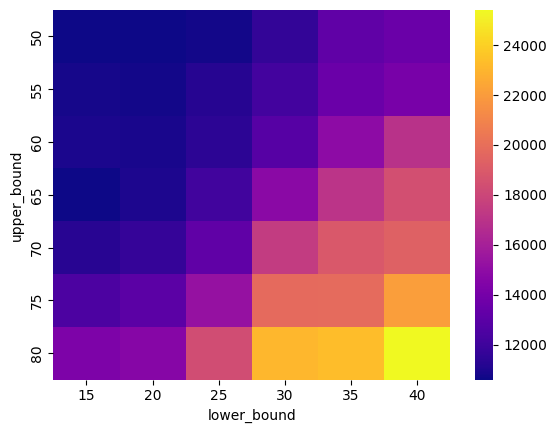

运行多时间框架策略的回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


运行含止损和止盈的策略回测:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


提取并打印交易数据:
    Size  EntryBar  ExitBar   EntryPrice    ExitPrice          PnL  ReturnPct  EntryTime   ExitTime Duration
0      5       185      209  1859.661851  2051.159912   957.490305   0.102975 2014-10-16 2014-11-19  34 days
1      5       399      399  1969.080324  1872.345514  -483.674049  -0.049127 2015-08-24 2015-08-24   0 days
2      5       495      501  1929.972235  1825.928528  -520.218537  -0.053909 2016-01-11 2016-01-20   9 days
3      5       502      552  1865.182881  2073.189941  1040.035300   0.111521 2016-01-21 2016-04-04  74 days
4      5       703      718  2087.957619  2210.209961   611.261710   0.058551 2016-11-04 2016-11-28  24 days
5      4      1017     1160  2620.009589  2908.939941  1155.721408   0.110278 2018-02-06 2018-08-30 205 days
6      4      1189     1200  2782.423857  2646.395935  -544.111687  -0.048888 2018-10-11 2018-10-26  15 days
7      4      1202     1236  2645.961292  2509.187500  -547.095167  -0.051692 2018-10-30 2018-12-19  50 days
8      4

In [7]:
# 导入必要的库
import pandas as pd
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '../Datasets/SPX.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)

# 显示数据的前几行
print("数据的前几行:")
print(data.head())

# 检查 'Close' 列是否有 NaN 值
print("NaN values in 'Close':", data['Close'].isna().sum())

# 填充 'Close' 列中的 NaN 值
data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')

# 检查数据类型和统计信息
print("数据类型:")
print(data.dtypes)
print("数据统计信息:")
print(data.describe())

# 计算 RSI 并移除包含 NaN 值的行
data['RSI'] = ta.rsi(data['Close'], length=14)
data = data.dropna(subset=['RSI'])

print("数据（移除 NaN 后）的前几行:")
print(data.head())

# 定义 RsiOscillator 策略类
class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

# 运行回测
print("运行基本的 RSI 策略回测:")
bt = Backtest(data, RsiOscillator, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 打印统计数据
print("统计数据:")
print(stats)

# 优化参数
print("优化策略参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]'
)

# 打印优化后的参数
strategy = stats["_strategy"]
print(f"Optimized upper_bound: {strategy.upper_bound}")
print(f"Optimized lower_bound: {strategy.lower_bound}")

# 自定义优化函数
def optim_func(series):
    if series['# Trades'] < 10:
        return -1
    else:
        return series['Equity Final [$]']/series['Exposure Time [%]']

# 使用自定义函数优化参数
print("使用自定义函数优化参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize=optim_func
)

# 创建参数优化热图
print("创建参数优化热图:")
stats, heatmap = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]',
    return_heatmap=True
)

hm = heatmap.groupby(["upper_bound", "lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()

# 定义多时间框架策略
class RsiOscillatorMultiTF(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.daily_rsi = self.I(ta.rsi, close, self.rsi_window)
        weekly_close = close.resample('W-FRI').last().ffill()
        weekly_rsi = ta.rsi(weekly_close, self.rsi_window).reindex(close.index, method='ffill')
        self.weekly_rsi = self.I(lambda: weekly_rsi.values, name='weekly_rsi')

    # 逐步执行
    def next(self):
        if (crossover(self.daily_rsi, self.upper_bound) and
                self.weekly_rsi[-1] > self.upper_bound):
            self.position.close()
        elif (crossover(self.lower_bound, self.daily_rsi) and
                self.lower_bound > self.weekly_rsi[-1]):
            self.buy()

# 运行多时间框架策略的回测
print("运行多时间框架策略的回测:")
bt = Backtest(data, RsiOscillatorMultiTF, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 定义含止损和止盈的策略
class RsiOscillatorWithSLTP(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        price = self.data.Close[-1]
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy(tp=1.15 * price, sl=0.95 * price)

# 运行含止损和止盈的策略回测
print("运行含止损和止盈的策略回测:")
bt = Backtest(data, RsiOscillatorWithSLTP, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 提取并打印交易数据
print("提取并打印交易数据:")
print(stats['_trades'].to_string())


数据的前几行:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  1831.979980   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  1831.369995   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  1826.770020   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  1837.880005   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  1837.489990   

                Volume  
Date                    
2014-01-02  3080600000  
2014-01-03  2774270000  
2014-01-06  3294850000  
2014-01-07  3511750000  
2014-01-08  3652140000  
NaN values in 'Close': 0
数据类型:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
数据统计信息:
              Open         High          Low        Close    Adj Close  \
count  251

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


统计数据:
Start                     2014-01-23 00:00:00
End                       2023-12-29 00:00:00
Duration                   3627 days 00:00:00
Exposure Time [%]                   37.969624
Equity Final [$]                 18773.017973
Equity Peak [$]                  18807.457425
Return [%]                           87.73018
Buy & Hold Return [%]              160.865984
Return (Ann.) [%]                    6.549201
Volatility (Ann.) [%]               13.601024
Sharpe Ratio                         0.481523
Sortino Ratio                        0.740942
Calmar Ratio                         0.266603
Max. Drawdown [%]                  -24.565388
Avg. Drawdown [%]                     -2.7071
Max. Drawdown Duration      438 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   11
Win Rate [%]                        81.818182
Best Trade [%]                      18.324905
Worst Trade [%]                     -2.191561
Avg. Trade [%]              

C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Optimized upper_bound: 80
Optimized lower_bound: 30
使用自定义函数优化参数:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


创建参数优化热图:


C:\Users\23713\anaconda3\envs\pytorch\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


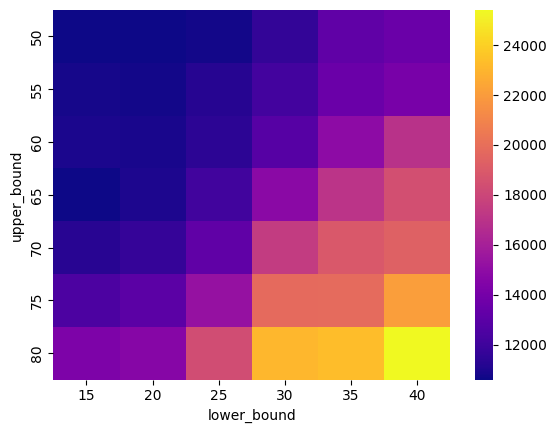

运行多时间框架策略的回测:


ValueError: Indicators must return (optionally a tuple of) numpy.arrays of same length as `data` (data shape: (2502,); indicator "rsi(14)"shape: (519,), returned value: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 63.74171783 62.84854409 62.62826763 67.16055599
 71.00873058 74.60685068 69.81667999 73.50179942 72.81714607 75.91381913
 69.6740382  71.19369971 71.21120434 55.1990961  56.4751659  60.8515893
 66.07065428 68.12542547 68.71691573 62.3516881  66.13931663 59.04936482
 55.5682947  44.02100389 41.13435364 54.14425677 60.58936578 62.07829626
 62.93717064 65.46228514 65.89136798 66.74718815 53.2825332  61.17245444
 62.95923618 58.10144768 56.06109126 52.30986508 56.32594442 48.59576215
 55.58220797 59.63787231 60.87128316 60.01068842 55.19457681 52.745183
 58.77873438 52.55854972 53.23101617 57.10068586 54.22636061 58.18953406
 56.82537192 57.71242492 58.4920546  58.90190998 55.58786984 53.07974265
 53.27932735 55.79169338 54.11427281 49.45889778 49.42926171 57.92247079
 49.51016257 53.27251146 49.00204625 51.24051439 36.38622796 39.21427351
 33.2286268  39.12065433 38.84079108 36.36481947 39.48117946 48.15749906
 50.35570178 55.08771378 55.54472393 57.72763922 47.98657907 55.07523992
 55.16878684 55.33708279 46.00008173 45.29246143 51.78547192 49.82685301
 38.58859415 35.62843665 38.84736684 42.71809043 38.0371951  36.93155183
 43.11236184 46.34645968 51.447091   53.48261439 55.9371016  54.3977576
 57.77737519 54.78860665 57.87614338 58.86686782 55.46423828 54.4125189
 53.01550564 53.70956323 59.04292199 59.05051229 58.53853957 54.41244659
 49.31899375 57.60387693 60.46575659 63.59266444 64.84262073 64.58569018
 65.53899833 65.66568879 65.62606751 62.29004955 63.75381188 53.15720899
 54.91297573 58.66596728 59.17910568 56.13327537 52.01415411 53.46321744
 50.50174558 43.28422612 56.234846   58.48229559 62.24539158 58.36862619
 65.6453302  65.37946434 65.96112698 61.13434786 65.31243402 64.85190455
 64.15865109 66.83905718 67.14800138 69.25849624 72.79147359 74.26160297
 75.64379805 72.83561728 73.40661507 64.54423856 66.89772927 65.11437277
 58.85677842 61.79235021 66.43221802 68.19953486 66.11525789 63.81958877
 68.23528976 70.84845711 68.93100564 69.10123561 69.76704778 65.3805024
 65.65692631 70.53642223 72.1926624  72.04806259 72.68161027 61.4254141
 57.18947845 60.44896802 65.81471003 61.74319454 67.32868735 67.59004472
 69.82880946 73.3015534  73.71893681 76.03480395 76.62460765 77.31908202
 75.34635447 74.07882147 76.93379024 80.78279754 81.55563236 83.43499056
 83.97951426 80.3060696  85.26643854 87.38648914 88.39096306 90.50794659
 67.16371874 49.47141204 58.72432508 59.78577927 54.20606402 60.89082425
 57.60737184 45.17691759 48.98559608 46.57469439 50.32376161 51.30637423
 51.28821922 50.74254382 55.76415452 54.3942526  55.06799618 56.17636067
 59.74939789 59.7994619  56.80599788 52.62606252 56.53628834 60.08749048
 60.13145876 61.61911975 63.47886757 62.40943579 63.96746606 66.16854517
 68.43683545 63.34956933 66.35524014 68.42296868 65.66130034 60.87048324
 45.85079667 45.92966627 36.35993437 43.80075233 49.52264967 45.6576406
 38.2126655  49.19105046 41.31729133 39.5405051  31.47452349 36.71610881
 40.01866338 44.37123489 48.98572865 48.6384818  51.25106333 51.33720946
 55.57834025 56.60498432 57.29123085 52.38379499 57.51739466 55.74309458
 57.9071213  61.42468944 62.27832071 62.03847361 64.21200062 64.57304629
 57.59438981 55.39930971 52.12506918 45.69473595 55.40471025 56.35000378
 60.54202112 59.69587016 62.8247885  64.25955807 60.27439502 63.50482301
 54.42610275 53.25492571 50.63076039 47.15957461 53.68669735 57.41678288
 59.35199586 57.8399038  54.86465867 53.9002644  55.47396292 56.85760859
 59.91839039 63.33682676 65.2213275  67.12520545 65.68682073 67.92078528
 68.27806189 69.95144945 73.41066032 74.54257895 73.61450887 75.5486152
 79.03588102 73.07234995 62.64559311 69.49396522 72.30090271 66.93769403
 38.86228869 40.1418007  30.30631945 21.49369938 33.60478946 32.4027434
 44.57619963 47.44412125 46.29278321 46.10069104 49.7879197  47.45573905
 50.8941671  54.0316341  58.80434004 52.7840824  54.63345541 51.23668177
 55.31707043 57.07678921 58.35080165 57.92627271 59.84475577 62.50456642
 63.21073524 64.03288429 67.58962818 62.7068828  57.9257075  56.76040104
 55.58364002 57.82287812 62.99873657 63.25040768 61.99633017 50.54574084
 60.23742359 62.72449103 61.22063322 63.94532319 65.88644163 63.71856307
 65.30279892 64.88118259 66.80782126 69.16563132 65.07141347 67.73982058
 59.26698967 65.56000327 67.08314584 65.26218896 59.36480684 60.60021371
 64.43501881 62.48188806 64.81542911 66.47233608 70.11443557 71.82896927
 71.41629246 71.44962029 73.18153006 68.09955869 66.57496086 68.60505374
 69.66518639 70.39799575 62.85208266 68.05415863 70.81408477 71.4521537
 67.53570589 70.95824543 69.41881289 71.10394115 72.35556429 69.63857921
 72.49814304 73.53156143 65.69218388 63.27318652 64.51006902 55.67206834
 57.83946134 62.4525138  66.12038739 68.81851978 72.42224481 71.01423102
 71.62571938 61.9932097  57.46767845 65.77897656 59.21873453 63.7044258
 65.28403293 59.16359396 58.22853385 44.18008988 45.97684218 49.52084717
 45.67347831 42.63427883 44.66770029 42.15878049 37.14179625 50.36002547
 53.6052693  53.71938972 50.94404209 46.63230817 41.81989424 37.0529342
 36.77563277 33.63709542 30.21557034 43.24874527 41.62880894 35.62412962
 30.47253708 40.22896184 38.12734176 40.9731775  40.00395639 43.88996829
 49.87823631 50.38203296 54.81253675 52.86623543 46.93296754 42.88512546
 48.06018168 42.44451726 38.00545387 35.60908652 37.73240841 36.37953284
 42.98098809 48.05457329 44.31752533 51.27122315 50.42978379 52.28749295
 53.68913251 49.01718034 46.41895614 46.17663557 45.994193   48.29268269
 52.37734687 51.26697298 55.0619666  57.46275641 55.24385085 54.68203941
 49.48414305 52.83159159 45.01154725 47.5139902  49.93638068 55.55802657
 55.35042867 56.67603124 56.44807374 58.03457499 56.004322   55.24210962
 58.62550823 59.28308801 62.90836163 63.65543836 68.27617    63.46860612
 67.56575072 63.68901686 67.80711097 68.90986291 70.52368869 62.58030472
 61.57818383 55.15910196 57.00112543 62.12382508 58.17173604 57.68550137
 49.57821082 47.80032673 49.05719133 50.27282827 44.17195316 38.92868633
 52.60097426 55.15405503 59.25691393 61.01897701 62.38323826 62.77052547
 67.07403202 68.29234939 68.82515287])

In [3]:
# 导入必要的库
import pandas as pd
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '../Datasets/SPX.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)

# 显示数据的前几行
print("数据的前几行:")
print(data.head())

# 检查 'Close' 列是否有 NaN 值
print("NaN values in 'Close':", data['Close'].isna().sum())

# 填充 'Close' 列中的 NaN 值
data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')

# 检查数据类型和统计信息
print("数据类型:")
print(data.dtypes)
print("数据统计信息:")
print(data.describe())

# 计算 RSI 并移除包含 NaN 值的行
data['RSI'] = ta.rsi(data['Close'], length=14)
data = data.dropna(subset=['RSI'])

print("数据（移除 NaN 后）的前几行:")
print(data.head())

# 定义 RsiOscillator 策略类
class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

# 运行回测
print("运行基本的 RSI 策略回测:")
bt = Backtest(data, RsiOscillator, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 打印统计数据
print("统计数据:")
print(stats)

# 优化参数
print("优化策略参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]'
)

# 打印优化后的参数
strategy = stats["_strategy"]
print(f"Optimized upper_bound: {strategy.upper_bound}")
print(f"Optimized lower_bound: {strategy.lower_bound}")

# 自定义优化函数
def optim_func(series):
    if series['# Trades'] < 10:
        return -1
    else:
        return series['Equity Final [$]']/series['Exposure Time [%]']

# 使用自定义函数优化参数
print("使用自定义函数优化参数:")
stats = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize=optim_func
)

# 创建参数优化热图
print("创建参数优化热图:")
stats, heatmap = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(15, 45, 5),
    rsi_window=range(10, 30, 2),
    maximize='Equity Final [$]',
    return_heatmap=True
)

hm = heatmap.groupby(["upper_bound", "lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()

# 定义多时间框架策略
class RsiOscillatorMultiTF(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.daily_rsi = self.I(ta.rsi, close, self.rsi_window)
        weekly_close = close.resample('W-FRI').last().dropna()
        self.weekly_rsi = self.I(ta.rsi, weekly_close, self.rsi_window)

    # 逐步执行
    def next(self):
        if (crossover(self.daily_rsi, self.upper_bound) and
                self.weekly_rsi[-1] > self.upper_bound):
            self.position.close()
        elif (crossover(self.lower_bound, self.daily_rsi) and
                self.lower_bound > self.weekly_rsi[-1]):
            self.buy()

# 运行多时间框架策略的回测
print("运行多时间框架策略的回测:")
bt = Backtest(data, RsiOscillatorMultiTF, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 定义含止损和止盈的策略
class RsiOscillatorWithSLTP(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # 初始化计算
    def init(self):
        close = pd.Series(self.data.Close, index=self.data.index)
        self.rsi = self.I(ta.rsi, close, self.rsi_window)

    # 逐步执行
    def next(self):
        price = self.data.Close[-1]
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy(tp=1.15 * price, sl=0.95 * price)

# 运行含止损和止盈的策略回测
print("运行含止损和止盈的策略回测:")
bt = Backtest(data, RsiOscillatorWithSLTP, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()

# 提取并打印交易数据
print("提取并打印交易数据:")
print(stats['_trades'].to_string())
